In [1]:
import time
import pandas as pd
import json
from selenium import webdriver
import time
# "profile.managed_default_content_settings.images": 2, 
chromeOptions = webdriver.ChromeOptions()
prefs={'disk-cache-size': 4096 }
chromeOptions.add_experimental_option('prefs', prefs)
extension='C:/Users/bashi/Downloads/block.crx'
chromeOptions.add_extension(extension)
browser = webdriver.Chrome("C:/Users/bashi/Downloads/Compressed/chromedriver.exe",options=chromeOptions)

In [ ]:
browser.get("https://trell.co/watch")

In [ ]:
scr = browser.find_element_by_id('__NEXT_DATA__').get_attribute('innerHTML')

In [ ]:
browser.find_element_by_xpath('.//button[contains(text(),"English")]').click()

In [ ]:
data = json.loads(scr)

In [ ]:
data['props']['pageProps']['items']

In [ ]:
trells = json.loads(data['props']['pageProps']['items'])

In [ ]:
data = []
for trell in trells:
    data+=trell['trails']

In [ ]:
data

In [ ]:
trells = browser.find_elements_by_css_selector('.grid__cell')

In [ ]:
trells_data = []
for single_trell in trells:
    single_trell_data = single_trell.text.split("\n")
    title_tag = single_trell_data[1].split(' #')
    title,tag = title_tag[0],title_tag[1:]
    trells_data.append({
        'title':title,
        'tag':tag,
        'views':single_trell_data[0],
        'author':single_trell_data[2]
    })

In [ ]:
trells_data[0]

In [17]:
import requests
import json

In [ ]:
trells_result=[]

In [ ]:
base_api_url  = 'https://api.trell.co/api/v1/home/v3/videos'

In [ ]:
trells_data = json.loads(requests.get(base_api_url).text)

In [ ]:
trells_data['items'][0]['trails'][0]

In [ ]:
resulted_trell_data = []
def get_data(api_url):
    global resulted_trell_data
    trells_data = json.loads(requests.get(api_url).text)
    if 'nextToken' in trells_data and len(resulted_trell_data)<500:
        api_data = []
        next_url = f"{base_api_url}?nextToken={trells_data['nextToken']}"
        for trell_row in trells_data['items']:
            api_data+=trell_row['trails']

        resulted_trell_data+=api_data
        time.sleep(3)
        get_data(next_url)
    else:
        api_data = []
        for trell_row in trells_data['items']:
            api_data+=trell_row['trails']
        resulted_trell_data+=api_data


In [ ]:
get_data(base_api_url)

In [ ]:
for row in resulted_trell_data:
    row['trail']['id']

In [ ]:
unique=set()

In [ ]:
resulted_trell_data[1]

In [ ]:
with open('trell_dataset_clean.json', 'w') as outfile:
    json.dump(final, outfile)

In [ ]:
import copy
test = copy.deepcopy(resulted_trell_data)

In [ ]:
for row in test:
    title_tag = row['trail']['name'].strip().split('#')
    title =  title_tag[0].strip()
    tags=title_tag[1:]
    result_tag=[]
    for tag in tags:
        stripped_tag =tag.strip()
        if stripped_tag!="":
            result_tag.append(stripped_tag)
    row['trail']['name'] = title
    row['trail']['visibleTags']=result_tag

In [ ]:
for row in test[1:]:
    user = row['user']
    row.pop('user')
    row['trail']['user_avatar'] = user['avatar']
    row['trail']['user_name'] = user['name']
    row['trail']['user_handle'] = user['handle']
    row['trail']['user_url'] = user['url']
    counts = row['trail']['counts']
    row['trail'].pop('counts')
    row['trail']['counts_comments'] = counts['comments']
    row['trail']['counts_views'] = counts['views']
    row['trail']['counts_loves'] = counts['loves']
    row['trail']['counts_loveCounter'] = counts['loveCounter']
    row.pop('l2media')
    row.pop('cellType')
    image_video_url = row['trail'].pop('preview')
    row['trail']['image']=image_video_url['image']
    row['trail']['video']=image_video_url['video']
    row['trail'].pop('width')
    row['trail'].pop('height')
    row['trail'].pop('gradient')
    row['trail'].pop('coverImage')
    row['trail'].pop('thumbImage')
    row['trail'].pop('mapImage')
    row['trail'].pop('thumbSrc')

In [ ]:
for row in test[:1]:
    trail = row.pop('trail')
    row = trail

In [ ]:
final = []

In [ ]:
for row in test[2:]:
    final.append(row['trail'])

In [ ]:
final

In [ ]:
with open("trell_dataset_clean.json",encoding="utf8") as file:
    data=json.loads(file.read())

In [ ]:
data[0]['slug']

In [ ]:
base_api_url='https://trell.co.in/api/v1/suggestplaces?term=dance'

In [ ]:
trell_link="https://trell.co/watch/dance-163873e3e24f"
trells_data = requests.get(f'https://api.trell.co/api/v1/trail/{data[0]["slug"]}')

In [ ]:
with open('trell_dataset_199.json', 'w') as outfile:
    json.dump(complete_data, outfile)

In [14]:
def extract_data_from_ids():
    complete_urls = set()
    complete_data = []
    with open("trell_dataset_cleaned.json",encoding="utf8") as file:
        items=json.loads(file.read())
    for item in data:
        if 'slug' in item.keys():
            url = f'https://api.trell.co/api/v1/trail/{item["slug"]}'
            complete_urls.add(url)
    for url in complete_urls:
        res_data = requests.get(url)
        if res_data.status_code in range(200,299):
            item_data = json.loads(res_data.text)
            if 'trail' in item_data['result'].keys():
               complete_data.append(item_data['result']['trail'])
    return complete_data

suggested_data_slug = set()

def extract_suggested_ids_from_file(limit=2000):
    """
    input: None
    output : set of suggested_ids from dataset ids
    """
    
    with open("trell_dataset_2000.json",encoding="utf8") as file:
        items=json.loads(file.read())
    for item in items:
        if len(suggested_data_slug)<limit and item['id'] not in:            
            item_id = item['id']
            suggest = json.loads(requests.get(f'https://api.trell.co/api/v1/suggested/web/{item_id}').text)
            suggested_items = suggest['items']
            for row in suggested_items:
                for single_item in row['trails']:
                    suggested_data_slug.add(single_item['trail']['slug'])
            time.sleep(random.randint(0,4))
        else:
            break
    return suggested_data_slug

In [ ]:
from scrapy.http import HtmlResponse
from scrapy import Selector,FormRequest
from scrapy import Request
temp_response=HtmlResponse(url="", body=trells_data.text, encoding="utf-8")
temp_response.body.decode("utf-8")
temp_response.xpath('.//script[@id="__NEXT_DATA__"]//text').extract()

In [ ]:
'https://api.trell.co/api/v1/trail/dance-163873e3e24f'

In [ ]:
'https://api.trell.co/api/v1/home/v3/videos?nextToken=8'

In [ ]:
'https://api.trell.co/api/v1/suggested/web/3255651'

In [ ]:
'https://api.trell.co/api/v1/home/v2/blogs?nextToken=27'
"https://trell.co/tale/marine-drive-tagore-navabothu-f6b9ec574e3"

In [ ]:
"https://trell.co/location/ChIJHV_-3OHR5zsRae7zmuEA3C0"

In [26]:
with open("trell_dataset_cleaned.json",encoding="utf8") as file:
    items=json.loads(file.read())

In [32]:
de=json.loads(requests.get(f'https://api.trell.co/api/v1/suggested/web/3255651').text)

In [36]:
de['items'][0]['trails'][0]['trail']

{'id': '3252445',
 'name': 'SUNRISE MAKEUP LOOK🌤',
 'coverImage': '',
 'mapImage': '',
 'thumbImage': '',
 'isDeleted': 'false',
 'slug': 'sunrise-makeup-look-e1431a0dd586',
 'isHtml': False,
 'isSuggested': False,
 'thumbSrc': '',
 'url': 'https://trell.co/trail/sunrise-makeup-look-e1431a0dd586',
 'userId': '27945331',
 'width': '640',
 'height': '640',
 'gradient': '#000',
 'visibleTags': [],
 'preview': {'image': 'https://cdn.trell.co/w=360,h=360,fit=scale-down/user-images/images/orig/5oIperJa7N55Oe2ysdZmcGRE1TQUOoRj.jpg',
  'video': 'https://cdn.trell.co/h_360,w_360/eo_3/user-videos/videos/orig/YljqCMRfCykOhs6o2Pc7ef0XqyZsnbko.mp4'},
 'counts': {'comments': 16, 'views': 1542, 'loves': 35, 'loveCounter': 0}}

In [51]:
suggested_data_slug = set()

In [23]:
import random
import time

In [47]:
data[0]['id']
import time

In [58]:
trell_data=[]

In [57]:
len(suggested_data_ids)

2058

In [61]:
complete_urls=set()

In [62]:
for item in suggested_data_ids:
    url = f'https://api.trell.co/api/v1/trail/{item}'
    complete_urls.add(url)

In [65]:
complete_data=[]

In [67]:
urls= list(complete_urls)

In [124]:
for url in urls[1600:]:
    res_data = requests.get(url)
    if res_data.status_code in range(200,299):
        item_data = json.loads(res_data.text)
        if 'trail' in item_data['result'].keys():
           complete_data.append(item_data['result']['trail'])
    time.sleep(0.5)

In [123]:
len(complete_data)

1587

In [133]:
with open('trell_dataset_2000.json', 'w') as outfile:
    json.dump(complete_data, outfile)

In [171]:
# def clean_dataset(input_file_name="dataset_uncleaned",output_file_name="_trell_dataset_clean"):
#     with open(f"{input_file_name}.json",encoding="utf8") as file:
#         data=json.loads(file.read())
def clean_dataset(data):
    for item in data:
        author = item.pop('author')
        item.update({'author_id':author['id']})
        item.update({'author_name':author['name']})
        item.update({'author_handle':author['handle']})
        posts = item.pop('posts')[0]
        item.update({'posts_id':posts['id']})
        item.update({'posts_about':posts['about']})
        item.update({'posts_checkIn':posts['checkIn']})
        item.update({'posts_distance':posts['distance']})
        item.update({'posts_isVideo':posts['isVideo']})
        item.update({'posts_isVoice':posts['isVoice']})
        item.update({'posts_latitude':posts['latitude']})
        item.update({'posts_longitude':posts['longitude']})
        item.update({'posts_createdAt':posts['createdAt']})
        item.update({'posts_duration':posts['duration']})
        item.update({'posts_slug':posts['slug']})
        item.update({'posts_tryoutStatus':posts['tryoutStatus']})
        item.update({'posts_tryoutCount':posts['tryoutCount']})
        place = item.pop('place')
        item.update({'place_locality':place['locality']})
        item.update({'place_city':place['city']})
        item.update({'place_state':place['state']})
        item.update({'place_country':place['country']})
        item.update({'place_tags':place['tags']})
        item.update({'place_id':place['id']})
        counts = item.pop('counts')
        item.update({'counts_comments' : counts['comments']})
        item.update({'counts_views' : counts['views']})
        item.update({'counts_loves' : counts['loves']})
        item.update({'counts_tryouts' : counts['tryouts']})
        item.update({'counts_viewerLoves' : counts['viewerLoves']})
        item.pop('image')
        item.pop('thumbImage')
        item.pop('shareLink')
#     with open('trell_1000.json', 'w') as outfile:
#         json.dump(phase1, outfile)

In [163]:
clean_dataset(complete_data)

KeyError: 'id'

In [279]:
with open('trell_2046_clean.json', 'w') as outfile:
    json.dump(complete_data, outfile)

In [92]:
phase1[1000]

IndexError: list index out of range

In [34]:
data[]

{'id': 8873062,
 'userId': 143968326,
 'name': 'Kerala Style Fish Fry',
 'local_catg': 0,
 'slug': 'kerala-style-fish-fry-f0f8764665f2',
 'latitude': 0,
 'longitude': 0,
 'createdAt': '2021-01-16T14:23:28.000Z',
 'checkIn': 'Trell',
 'thumbImage': '',
 'isBlog': False,
 'isNsfw': False,
 'author_id': 143968326,
 'author_name': 'Maya Yummyoyummy',
 'author_handle': 'maya_yummyoyummy_',
 'posts_id': 15806639,
 'posts_about': '',
 'posts_checkIn': 'Trell',
 'posts_distance': None,
 'posts_isVideo': True,
 'posts_isVoice': False,
 'posts_latitude': 0,
 'posts_longitude': 0,
 'posts_createdAt': '2021-01-16T14:23:29.000Z',
 'posts_duration': 119.16,
 'posts_slug': 'trell-maya-yummyoyummy-adcf130af1ef',
 'posts_tryoutStatus': False,
 'posts_tryoutCount': 1,
 'place_locality': 'New Tippasandra',
 'place_city': 'Bengaluru',
 'place_state': 'Karnataka',
 'place_country': 'India',
 'place_tags': 'point_of_interest,establishment',
 'place_id': '224ae2',
 'counts_comments': 9,
 'counts_views': 1728

In [253]:
complete_data[507]

{'id': 8797468,
 'userId': 129105125,
 'name': '5 Day Hair Care Regimen',
 'local_catg': 0,
 'slug': '5-day-hair-care-regimen-f5c863d1cfbd',
 'latitude': 0,
 'longitude': 0,
 'createdAt': '2020-12-30T14:21:52.000Z',
 'checkIn': 'Trell',
 'isBlog': False,
 'isNsfw': False,
 'author_id': 129105125,
 'author_name': "Men's World",
 'author_handle': 'Mens_World_',
 'posts_id': 15724939,
 'posts_about': '',
 'posts_checkIn': 'Trell',
 'posts_distance': None,
 'posts_isVideo': True,
 'posts_isVoice': False,
 'posts_latitude': 0,
 'posts_longitude': 0,
 'posts_createdAt': '2020-12-30T14:21:54.000Z',
 'posts_duration': 227.64,
 'posts_slug': 'trell-men-s-world-caceff18bb76',
 'posts_tryoutStatus': False,
 'posts_tryoutCount': 1,
 'place_locality': 'New Tippasandra',
 'place_city': 'Bengaluru',
 'place_state': 'Karnataka',
 'place_country': 'India',
 'place_tags': 'point_of_interest,establishment',
 'place_id': '224ae2',
 'counts_comments': 15,
 'counts_views': 1625,
 'counts_loves': 76,
 'count

In [278]:
for i,item in enumerate(complete_data):
    if len(item)>38:
        print(i)
        print(item['id'])

In [38]:
for item in data:
    print(item['place_locality'],item['place_city'],item['place_state'])

New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
india india india
New Delhi New Delhi Delhi
india india india
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
Delhi Delhi Delhi
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
Delhi Delhi Delhi
india india india
New Tippasandra Bengaluru Karnataka
india india india
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
New Tippasandra Bengaluru Karnataka
Ne

In [266]:
df = pd.DataFrame(data=complete_data)

In [275]:
df.head()

,id,userId,name,local_catg,slug,latitude,longitude,createdAt,checkIn,isBlog,...,place_city,place_state,place_country,place_tags,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,counts_viewerLoves
0,8873398,137455834,ரிசெப்ஷன் மேக்கப்,0,-b138765b67c3,0.0,0.0,2021-01-16T15:47:52.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,9.0,1503.0,88.0,1.0,0.0
1,8935889,134780322,Hair treatment at home in just 1 min. #Trell,0,hair-treatment-at-home-in-just-1-min-trell-875...,0.0,0.0,2021-02-09T22:58:51.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,30.0,49882.0,8497.0,1.0,0.0
2,8873270,143968789,PUNJABI SAMOSA,0,punjabi-samosa-8d58765365c7,0.0,0.0,2021-01-16T15:22:45.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,5.0,1286.0,51.0,1.0,0.0
3,8932695,143580241,Valentine 2021 #TrellWhatYouLove,0,valentine-2021-trellwhatyoulove-01e884d57846,0.0,0.0,2021-02-08T17:37:08.000Z,Delhi,False,...,Delhi,Delhi,India,"locality,political",5a6,7.0,33503.0,5488.0,1.0,0.0
4,8932615,101874963,DIY planter,0,diy-planter-bb6884d07872,0.0,0.0,2021-02-08T17:08:41.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,6.0,1592.0,146.0,1.0,0.0


In [4]:
df.to_csv('trell_database_clean_2000.csv', index=False)

NameError: name 'df' is not defined

In [1]:
import pandas as pd
# import numpy as np
# import seaborn as sns

In [2]:
df=pd.read_csv('trell_database_clean_2000.csv')

In [45]:
df = pd.DataFrame(data=data)

In [3]:
df.info

<bound method DataFrame.info of            id     userId                                            name  \
0     8873398  137455834                              ரிசெப்ஷன் மேக்கப்    
1     8935889  134780322  Hair treatment at home in just 1 min.   #Trell   
2     8873270  143968789                                  PUNJABI SAMOSA   
3     8932695  143580241                Valentine 2021 #TrellWhatYouLove   
4     8932615  101874963                                     DIY planter   
...       ...        ...                                             ...   
2036  8537135   86463060                          देखें मां शब्द का जादू   
2037  8940486  127764449             Miniature Plants കിടിലൻ പ്ലാന്റുകൾ    
2038  8905587  150885377                           beautiful Ganesha 😍😍🤗   
2039  8901824  128987319                            Best haircut for men   
2040  8372184   58872388                   BEST TONER for all skin types   

      local_catg                                       

In [4]:
df.head()

,id,userId,name,local_catg,slug,latitude,longitude,createdAt,checkIn,isBlog,...,place_city,place_state,place_country,place_tags,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,counts_viewerLoves
0,8873398,137455834,ரிசெப்ஷன் மேக்கப்,0,-b138765b67c3,0.0,0.0,2021-01-16T15:47:52.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,9.0,1503.0,88.0,1.0,0.0
1,8935889,134780322,Hair treatment at home in just 1 min. #Trell,0,hair-treatment-at-home-in-just-1-min-trell-875...,0.0,0.0,2021-02-09T22:58:51.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,30.0,49882.0,8497.0,1.0,0.0
2,8873270,143968789,PUNJABI SAMOSA,0,punjabi-samosa-8d58765365c7,0.0,0.0,2021-01-16T15:22:45.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,5.0,1286.0,51.0,1.0,0.0
3,8932695,143580241,Valentine 2021 #TrellWhatYouLove,0,valentine-2021-trellwhatyoulove-01e884d57846,0.0,0.0,2021-02-08T17:37:08.000Z,Delhi,False,...,Delhi,Delhi,India,"locality,political",5a6,7.0,33503.0,5488.0,1.0,0.0
4,8932615,101874963,DIY planter,0,diy-planter-bb6884d07872,0.0,0.0,2021-02-08T17:08:41.000Z,Trell,False,...,Bengaluru,Karnataka,India,"point_of_interest,establishment",224ae2,6.0,1592.0,146.0,1.0,0.0


In [5]:
df['year']=-1
df['month']=-1
df['date']=-1
df['time']=-1

In [6]:
df.sort_values(by=["counts_views"],inplace = True,ascending = False)
df

,id,userId,name,local_catg,slug,latitude,longitude,createdAt,checkIn,isBlog,...,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,counts_viewerLoves,year,month,date,time
1234,2990881,332478,Joker Movie 2019 review,0,joker-movie-2019-review-ea02da321a4f,0.0,0.0,2019-12-25T18:45:04.000Z,Kolkata,False,...,274,165.0,112100.0,3971.0,1.0,0.0,-1,-1,-1,-1
1044,8713500,28393243,STOP HAIRFALL with this OIL,0,stop-hairfall-with-this-oil-73284f51c2db,0.0,0.0,2020-11-30T18:08:22.000Z,Delhi,False,...,5a6,20.0,85272.0,18329.0,1.0,0.0,-1,-1,-1,-1
216,8880117,142955689,Desi chilli chicken,0,desi-chilli-chicken-67d877ff5d36,0.0,0.0,2021-01-19T10:18:20.000Z,"Khirki Extension, Malviya Nagar",False,...,150c57,30.0,68184.0,11250.0,1.0,0.0,-1,-1,-1,-1
1862,8876748,142955689,Fish Curry,0,fish-curry-c728772cc80d,0.0,0.0,2021-01-17T20:32:19.000Z,Chanderi,False,...,bab9,12.0,68033.0,11763.0,1.0,0.0,-1,-1,-1,-1
889,9169470,134780322,Home biceps variations - Quick & Easy workout ...,0,home-biceps-variations-quick-easy-workout-for-...,0.0,0.0,2021-03-22T17:29:58.000Z,Trell,False,...,224ae2,244.0,64037.0,10197.0,1.0,0.0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9198791,63678082,Without Foundation affordable Make up tutorial,0,without-foundation-affordable-make-up-tutorial...,0.0,0.0,2021-04-05T18:57:50.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1
1196,8995013,121269615,Onion and Garlic Stimulating Ayurvedic Hair Oil,0,onion-and-garlic-stimulating-ayurvedic-hair-oi...,0.0,0.0,2021-02-16T18:21:04.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1
1197,8871085,128808886,No gym no problem.,0,no-gym-no-problem-281875cadecd,0.0,0.0,2021-01-15T18:10:04.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1
1198,8737336,123502664,follow this best hair growth home remedy,0,follow-this-best-hair-growth-home-remedy-b1d85...,0.0,0.0,2020-12-08T17:42:06.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1


In [7]:
import re

In [8]:
def get_year_month_date(timestamp):
    regex_pattern = "(?P<year>(\w+))-(?P<month>(\w+))-(?P<date>(\w+))T(?P<time>(\w+:\w+:\w+))"
    match = re.search(regex_pattern,timestamp)
    try:
        return match['year'],match['month'],match['date'],match['time']
    except:
        return None
    
def extract_data_from_data(row):
    current_timestamp = row['createdAt']
    separated_timestamp = get_year_month_date(current_timestamp)
    if separated_timestamp:
        row['year'],row['month'],row['date'],row['time']=separated_timestamp
        return row
    return row
new_df = df.apply(extract_data_from_data,axis=1)

In [9]:
# 1 to midnight to 3am
# 3 to 6 am
# 6 to 9 am
# 9 to 12 noon
# 12 to 15 pm
# 15 to 18 pm
# 18 to 21 pm
# 21 to 24 pm
def divide_time(row):
    hour = int(row['time'].split(":",1)[0])
    if hour < 3:
        row['time'] = 1
    elif hour < 6:
        row['time'] = 2
    elif hour < 9:
        row['time'] = 3
    elif hour < 12:
        row['time'] = 4
    elif hour < 15:
        row['time'] = 5
    elif hour < 18:
        row['time'] = 6
    elif hour < 21:
        row['time'] = 7
    else:
        row['time'] = 8
    return row
try_df=new_df.apply(divide_time,axis=1)

In [10]:
sorted_df = try_df

In [11]:
sorted_df

,id,userId,name,local_catg,slug,latitude,longitude,createdAt,checkIn,isBlog,...,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,counts_viewerLoves,year,month,date,time
1234,2990881,332478,Joker Movie 2019 review,0,joker-movie-2019-review-ea02da321a4f,0.0,0.0,2019-12-25T18:45:04.000Z,Kolkata,False,...,274,165.0,112100.0,3971.0,1.0,0.0,2019,12,25,7
1044,8713500,28393243,STOP HAIRFALL with this OIL,0,stop-hairfall-with-this-oil-73284f51c2db,0.0,0.0,2020-11-30T18:08:22.000Z,Delhi,False,...,5a6,20.0,85272.0,18329.0,1.0,0.0,2020,11,30,7
216,8880117,142955689,Desi chilli chicken,0,desi-chilli-chicken-67d877ff5d36,0.0,0.0,2021-01-19T10:18:20.000Z,"Khirki Extension, Malviya Nagar",False,...,150c57,30.0,68184.0,11250.0,1.0,0.0,2021,01,19,4
1862,8876748,142955689,Fish Curry,0,fish-curry-c728772cc80d,0.0,0.0,2021-01-17T20:32:19.000Z,Chanderi,False,...,bab9,12.0,68033.0,11763.0,1.0,0.0,2021,01,17,7
889,9169470,134780322,Home biceps variations - Quick & Easy workout ...,0,home-biceps-variations-quick-easy-workout-for-...,0.0,0.0,2021-03-22T17:29:58.000Z,Trell,False,...,224ae2,244.0,64037.0,10197.0,1.0,0.0,2021,03,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9198791,63678082,Without Foundation affordable Make up tutorial,0,without-foundation-affordable-make-up-tutorial...,0.0,0.0,2021-04-05T18:57:50.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,04,05,7
1196,8995013,121269615,Onion and Garlic Stimulating Ayurvedic Hair Oil,0,onion-and-garlic-stimulating-ayurvedic-hair-oi...,0.0,0.0,2021-02-16T18:21:04.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,02,16,7
1197,8871085,128808886,No gym no problem.,0,no-gym-no-problem-281875cadecd,0.0,0.0,2021-01-15T18:10:04.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,15,7
1198,8737336,123502664,follow this best hair growth home remedy,0,follow-this-best-hair-growth-home-remedy-b1d85...,0.0,0.0,2020-12-08T17:42:06.000Z,Trell,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,12,08,6


In [12]:
del sorted_df['createdAt']
# as all are trell
del sorted_df['checkIn']
del sorted_df['counts_viewerLoves']

In [13]:
sorted_df['local_catg'].value_counts()

0    2039
1       2
Name: local_catg, dtype: int64

In [14]:
# deleting because has no relavance
del sorted_df['local_catg']

In [ ]:
# deleting because has no relavance as most of them are zero by default
del sorted_df['latitude']
del sorted_df['longitude']

In [36]:
sorted_df['author_name'].isnull()

1234    False
1044    False
216     False
1862    False
889     False
        ...  
1195     True
1196     True
1197     True
1198     True
1199     True
Name: author_name, Length: 2041, dtype: bool

In [57]:
sorted_df = sorted_df[:-12]

In [39]:
nan_row = sorted_df.index[sorted_df['author_name'].isna()]
for row in nan_row:
    sorted_df=sorted_df.drop(row,axis=0)

In [40]:
sorted_df.index[sorted_df['author_name'].isna()]

Int64Index([], dtype='int64')

In [42]:
sorted_df.isnull()

,id,userId,name,slug,isBlog,isNsfw,author_id,author_name,author_handle,posts_id,...,place_tags,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,year,month,date,time
1234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1858,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
sorted_df['isBlog'].value_counts()

1.0    1976
2.0      45
3.0       7
8.0       1
Name: counts_tryouts, dtype: int64

In [62]:
# no significance
del sorted_df['isBlog']

In [65]:
sorted_df['counts_tryouts'].value_counts()

1.0    1976
2.0      45
3.0       7
8.0       1
Name: counts_tryouts, dtype: int64

In [43]:
df = sorted_df

In [49]:
df.dtypes
del  df['author']
del  df['place']
del  df['counts']
del  df['posts']

id                      int64
userId                  int64
name                   object
local_catg              int64
slug                   object
latitude                int64
longitude               int64
createdAt              object
checkIn                object
thumbImage             object
isBlog                   bool
isNsfw                   bool
author_id               int64
author_name            object
author_handle          object
posts_id                int64
posts_about            object
posts_checkIn          object
posts_distance         object
posts_isVideo            bool
posts_isVoice            bool
posts_latitude        float64
posts_longitude       float64
posts_createdAt        object
posts_duration        float64
posts_slug             object
posts_tryoutStatus       bool
posts_tryoutCount       int64
place_locality         object
place_city             object
place_state            object
place_country          object
place_tags             object
place_id  

In [51]:
np.mean(df)

In [44]:
df.head()

,id,userId,name,slug,isBlog,isNsfw,author_id,author_name,author_handle,posts_id,...,place_tags,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,year,month,date,time
1234,2990881,332478,Joker Movie 2019 review,joker-movie-2019-review-ea02da321a4f,False,False,332478.0,Yeapralay,Yeapralay,8816245.0,...,"locality,political",274,165.0,112100.0,3971.0,1.0,2019,12,25,7
1044,8713500,28393243,STOP HAIRFALL with this OIL,stop-hairfall-with-this-oil-73284f51c2db,False,False,28393243.0,San Kalra,sankalra,15631362.0,...,"locality,political",5a6,20.0,85272.0,18329.0,1.0,2020,11,30,7
216,8880117,142955689,Desi chilli chicken,desi-chilli-chicken-67d877ff5d36,False,False,142955689.0,Priyanshu Kumar,THERAWTEXTURES,15814115.0,...,"sublocality_level_2,sublocality,political",150c57,30.0,68184.0,11250.0,1.0,2021,01,19,4
1862,8876748,142955689,Fish Curry,fish-curry-c728772cc80d,False,False,142955689.0,Priyanshu Kumar,THERAWTEXTURES,15810557.0,...,"locality,political",bab9,12.0,68033.0,11763.0,1.0,2021,01,17,7
889,9169470,134780322,Home biceps variations - Quick & Easy workout ...,home-biceps-variations-quick-easy-workout-for-...,False,False,134780322.0,Arshad Ahmed,IAMARSHD,16110636.0,...,"point_of_interest,establishment",224ae2,244.0,64037.0,10197.0,1.0,2021,03,22,6


In [45]:
df.describe(include="all")

,id,userId,name,slug,isBlog,isNsfw,author_id,author_name,author_handle,posts_id,...,place_tags,place_id,counts_comments,counts_views,counts_loves,counts_tryouts,year,month,date,time
count,2.029000e+03,2.029000e+03,2029,2029,2029,2029,2.029000e+03,2029,2029,2.029000e+03,...,2029,2029,2029.000000,2029.000000,2029.000000,2029.000000,2029,2029,2029,2029.000000
unique,NaN,NaN,1987,2029,1,2,NaN,228,237,NaN,...,10,29,NaN,NaN,NaN,NaN,4,10,31,NaN
top,NaN,NaN,नक्की पहा हा व्हिडीओ,i-m-just-so-fascinated-by-lord-krishna-just-hi...,False,False,NaN,Home Furnishing,Tasty_Pluss,NaN,...,"point_of_interest,establishment",224ae2,NaN,NaN,NaN,NaN,2021,02,16,NaN
freq,NaN,NaN,5,1,2029,2028,NaN,46,20,NaN,...,1806,1805,NaN,NaN,NaN,NaN,1616,740,191,NaN
mean,8.883679e+06,1.289706e+08,NaN,NaN,NaN,NaN,1.289706e+08,NaN,NaN,1.580380e+07,...,NaN,NaN,10.487925,3677.680138,499.286348,1.032528,NaN,NaN,NaN,5.808280
std,5.217650e+05,2.747587e+07,NaN,NaN,NaN,NaN,2.747587e+07,NaN,NaN,7.159024e+05,...,NaN,NaN,20.299131,8736.822802,1516.932843,0.243103,NaN,NaN,NaN,1.161602
min,2.000000e+00,2.600000e+01,NaN,NaN,NaN,NaN,2.600000e+01,NaN,NaN,2.000000e+00,...,NaN,NaN,0.000000,15.000000,2.000000,1.000000,NaN,NaN,NaN,1.000000
25%,8.871307e+06,1.213014e+08,NaN,NaN,NaN,NaN,1.213014e+08,NaN,NaN,1.580485e+07,...,NaN,NaN,5.000000,1182.000000,65.000000,1.000000,NaN,NaN,NaN,5.000000
50%,8.911738e+06,1.289601e+08,NaN,NaN,NaN,NaN,1.289601e+08,NaN,NaN,1.584752e+07,...,NaN,NaN,8.000000,1479.000000,97.000000,1.000000,NaN,NaN,NaN,6.000000
75%,8.995362e+06,1.374558e+08,NaN,NaN,NaN,NaN,1.374558e+08,NaN,NaN,1.593273e+07,...,NaN,NaN,10.000000,1803.000000,142.000000,1.000000,NaN,NaN,NaN,7.000000


<AxesSubplot:xlabel='time', ylabel='counts_views'>

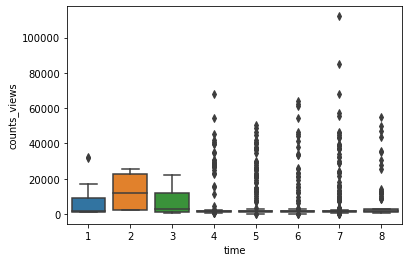

In [73]:
sns.boxplot(x="time",y="counts_views",data=df)

In [46]:
import matplotlib

In [61]:
import matplotlib.pyplot as plt
import numpy as np

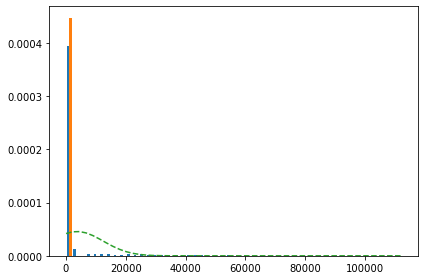

In [ ]:
n, bins, patches = ax.hist(, num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

[df['counts_views'],df['time']]

In [1]:
import  requests

In [25]:
url="https://undraw.co/api/download/png"
data = {
    
 "color":"#6c63ff",
 "image": "https://42f2671d685f51e10fc6-b9fcecea3e50b3b59bdc28dead054ebc.ssl.cf5.rackcdn.com/illustrations/Messaging_app_re_aytg.svg"
}
res = requests.post(url,data=data)

In [26]:
res.status_code

200

In [19]:
import json

In [28]:
data = json.loads(res.text)

In [29]:
data["image"]

'iVBORw0KGgoAAAANSUhEUgAAA/MAAALECAIAAADLlvdVAAAACXBIWXMAAAsTAAALEwEAmpwYAAAgAElEQVR42uzdh3sU5cL47+8/9HtBBesBIVSpUqQXBUUFrFiwgh4r6NEjCnosKOgRDyIqCiK9SQlFVKqCYKjSkmySTbIpv8H1zcsJIaZskpnd+76eywsRFvaZZ+CTcXae/1cJAABE3/8zBQAAoOwBAABlDwAAKHsAAEDZAwCAsgcAAJQ9AACg7AEAAGUPAADKHgAAUPYAAICyBwAAlD0AACh7AABA2QMAAMoeAABQ9gAAoOwBAABlDwAAKHsAAEDZAwCAsgcAAJQ9AACg7AEAAGUPAADKHgAAUPYAAICyBwAAlD0AAKDsAQBA2QMAAMoeAABQ9gAAgLIHAABlDwAAKHsAAEDZAwAAyh4AAJQ9AACg7AEAAGUPAAAoewAAUPYAAICyBwAAlD0AAKDsAQBA2QMAAMoeAABQ9gAAgLIHAABlDwAAKHsAAEDZAwAAyh4AAFD2AACg7AEAAGUPAAAoewAAQNkDAICyBwAAlD0AAKDsAQAAZQ8AAMoeAABQ9gAAgLIHAACUPQAAKHsAAEDZAwAAyh4AAFD2AACg7AEAAGUPAAAoewAAQNkDAICyBwAAlD0AAKDsAQAAZQ8AACj75nMUgLrxVwaAslf2AMoeQNmj7AGUPYCyR9kDKHsAZZ9xZW82AC5UUVHhD0kAZa/sAZQ9AMpe2QMoewBlj7IHUPYAyl7ZA6DsAZS9sgdQ9gAoe2UPoOwBlD3KHkDZAyh7Ze8vLQBlD6DslT2AsgdA2St7AGUPoOxR9gDKHkDZo+wBlD2Aslf2AMoeAGWv7AGUPYCyR9kDKHsAZY+yB1D2AMpe2QMoewCUvbIHUPYAyh5lD6DsAZQ9yh5A2QMoe2UPoOxNCICyV/YAyh5A2aPsAZQ9gLJH2QMoewBlr+wBlL0/JAGUvbIHUPYAKHtlD6DsAZQ9yh5

In [27]:
res.text

'{"image":"iVBORw0KGgoAAAANSUhEUgAAA/MAAALECAIAAADLlvdVAAAACXBIWXMAAAsTAAALEwEAmpwYAAAgAElEQVR42uzdh3sU5cL47+8/9HtBBesBIVSpUqQXBUUFrFiwgh4r6NEjCnosKOgRDyIqCiK9SQlFVKqCYKjSkmySTbIpv8H1zcsJIaZskpnd+76eywsRFvaZZ+CTcXae/1cJAABE3/8zBQAAoOwBAABlDwAAKHsAAEDZAwCAsgcAAJQ9AACg7AEAAGUPAADKHgAAUPYAAICyBwAAlD0AACh7AABA2QMAAMoeAABQ9gAAoOwBAABlDwAAKHsAAEDZAwCAsgcAAJQ9AACg7AEAAGUPAADKHgAAUPYAAICyBwAAlD0AAKDsAQBA2QMAAMoeAABQ9gAAgLIHAABlDwAAKHsAAEDZAwAAyh4AAJQ9AACg7AEAAGUPAAAoewAAUPYAAICyBwAAlD0AAKDsAQBA2QMAAMoeAABQ9gAAgLIHAABlDwAAKHsAAEDZAwAAyh4AAFD2AACg7AEAAGUPAAAoewAAQNkDAICyBwAAlD0AAKDsAQAAZQ8AAMoeAABQ9gAAgLIHAACUPQAAKHsAAEDZAwAAyh4AAFD2AACg7AEAAGUPAAAoewAAQNkDAICyBwAAlD0AAKDsAQAAZQ8AACj75nMUgLrxVwaAslf2AMoeQNmj7AGUPYCyR9kDKHsAZZ9xZW82AC5UUVHhD0kAZa/sAZQ9AMpe2QMoewBlj7IHUPYAyl7ZA6DsAZS9sgdQ9gAoe2UPoOwBlD3KHkDZAyh7Ze8vLQBlD6DslT2AsgdA2St7AGUPoOxR9gDKHkDZo+wBlD2Aslf2AMoeAGWv7AGUPYCyR9kDKHsAZY+yB1D2AMpe2QMoewCUvbIHUPYAyh5lD6DsAZQ9yh5A2QMoe2UPoOxNCICyV/YAyh5A2aPsAZQ9gLJH2QMoewBlr+wBlL0/JAGUvbIHUPYAKHtlD

In [31]:
pip install svglib

Note: you may need to restart the kernel to use updated packages.


In [36]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM
drawing = svg2rlg("file.svg")
renderPM.drawToFile(drawing, "file1.png", fmt="PNG")

AttributeError: fromstring

In [33]:
r = requests.get("https://42f2671d685f51e10fc6-b9fcecea3e50b3b59bdc28dead054ebc.ssl.cf5.rackcdn.com/illustrations/Audio_conversation_re_j5aa.svg", allow_redirects=True)

open('file.svg', 'wb').write(r.content)

5931

In [38]:
to_search = "sms"
flaticon_url=f"https://www.flaticon.com/search?word={to_search}"

In [37]:
import requests
import random
from requests_html import HTML

In [61]:
import random

In [69]:
def url_to_text(url):
    r = requests.get(url)
    if r.status_code == 200:
        html_text = r.text
        return html_text
    
# It will parse the html data into structure way 
def pharse_and_extract(url):
  # it will get the html data from url
    html_text = url_to_text(url)
    if html_text is None:
        return ""
    r_html = HTML(html=html_text)
    print(r_html)
    return r_html
  

In [70]:
icon = extract_icons_url(pharse_and_extract(flaticon_url),limit=5)

<HTML url='https://example.org/'>


In [71]:
print(data)

https://image.flaticon.com/icons/png/128/156/156931.png 
https://image.flaticon.com/icons/png/128/3985/3985406.png 
https://image.flaticon.com/icons/png/128/2811/2811016.png 
https://image.flaticon.com/icons/png/128/461/461961.png 
https://image.flaticon.com/icons/png/128/1436/1436393.png


In [2]:
import json

In [24]:
data = pd.read_csv("trell_database_clean_2000.csv")

In [25]:
data['slug']

0                                           -b138765b67c3
1       hair-treatment-at-home-in-just-1-min-trell-875...
2                             punjabi-samosa-8d58765365c7
3            valentine-2021-trellwhatyoulove-01e884d57846
4                                diy-planter-bb6884d07872
                              ...                        
2036                                        -bbf82442f7ab
2037                        miniature-plants-acd886bc6006
2038                       beautiful-ganesha-16a87e373545
2039                    best-haircut-for-men-fb487d4c048c
2040           best-toner-for-all-skin-types-5757fbfd8738
Name: slug, Length: 2041, dtype: object

In [26]:
already=set()

In [27]:
for i in data['slug']:
    already.add(i)

In [28]:
already

{'ramya-63b8387491b6',
 'is-he-your-soulmate-87686235233a',
 'get-glowing-spotless-skin-reduce-pigmentation-dark-spots-2fc87edb77af',
 '-1fd85d734ba7',
 'my-top-5-lipsticks-a6e89419e720',
 'skirt-styling-for-different-occasions-skirt-styling-video-style-skirtstyle-fashion-blogger-a5c87aad453b',
 '-6a68ae15d0c2',
 'valentine-s-day-zoom-date-looks-trellwhatyoulove-868885e89511',
 'bridesmaid-slaying-with-her-simple-move-c1a892879cdd',
 '-5e5876891705',
 'the-most-amazing-overwater-bungalows-for-a-dreamy-honeymoon-dc4892b5c5e4',
 '-a80841f78e87',
 '-16289312412b',
 '-44c88497bf2e',
 'date-night-setup-610886762eb1',
 'how-to-wear-your-white-edition-ffa877bb6f35',
 'crazy4bolly-cbc85ad477b5',
 'some-flower-bloom-propagation-2-3b38a1c96410',
 '-3d385c03d1b8',
 'how-to-get-a-hair-spa-at-home-8fa87ef513ae',
 'hey-everyone-so-i-have-styled-a-satin-saree-in-4-ways-let-me-know-your-favorite-saree-satin-63f885b0a822',
 'decorative-ideas-for-your-christmas-tree-1d685991d80f',
 'chocolate-coffee-cak

In [12]:
suggested_data_slug = suggested_data_slug.union(already)

In [21]:
len(suggested_data_slug)

1933

In [20]:
final = extract_suggested_ids_from_file(limit=7000)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [29]:
left = suggested_data_slug-already

In [30]:
len(left)

308